<a href="https://colab.research.google.com/github/chabhadia-nikhil/PRODIGY_ML_03/blob/main/SVM_dog_cat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report

# Importing images

In [9]:
images = []
labels = []
train_data = '/content/drive/MyDrive/prodigy_ml_linearreg/dog n cat/train'

count = 0
for i in os.listdir(train_data):
  category_path = os.path.join(train_data,i)

  for j in os.listdir(category_path):
    count+=1
    if (count == 1000):
      break
    image_path = os.path.join(category_path,j)
    image = cv2.imread(image_path,0)
    image = cv2.resize(image,(64,64))
    images.append(image)

    labels.append(i)

  count = 0

In [34]:
X = np.array(images)
y = np.array(labels)
X = X/255
X_flatten = X.reshape(1719,-1)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_flatten, y, test_size=0.2)

In [43]:
para_grid = {
    'C':[1,5,10],
    'kernel': ['linear', 'rbf', 'poly']
}

In [44]:
svm = SVC()

grid_search = GridSearchCV(svm, para_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'C': 1, 'kernel': 'rbf'}


In [45]:
y_pred = grid_search.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

print(classification_report(y_test, y_pred, target_names=['cat', 'dog']))

Accuracy: 0.6540697674418605
              precision    recall  f1-score   support

         cat       0.65      0.34      0.45       141
         dog       0.66      0.87      0.75       203

    accuracy                           0.65       344
   macro avg       0.65      0.61      0.60       344
weighted avg       0.65      0.65      0.62       344



In [87]:
test_image_path = '/content/drive/MyDrive/prodigy_ml_linearreg/dog n cat/test/102.jpg'

test_image = cv2.imread(test_image_path,0)
test_image = cv2.resize(test_image,(64,64))

test_image_flatten = test_image.reshape(-1,64*64)

In [88]:
pred = grid_search.predict(test_image_flatten)

The predicition is:  ['dog']


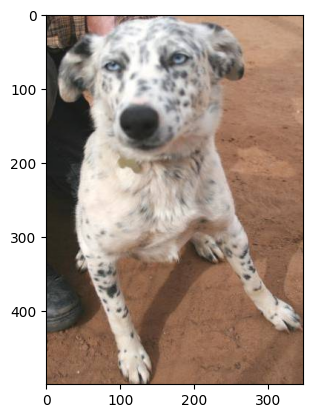

In [89]:
print("The predicition is: ",pred)
plt.imshow(plt.imread(test_image_path))